<h1>Zomato Data Cleaning and Exploration<h1>

In [1]:
#Importing necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Loading the data
zomato = pd.read_csv('./data/zomato.csv')
zomato.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

<h3>Data Preparation<h3>

In [5]:
#Dropping unnecessary columns
zomato.drop(['url', 'address','votes','phone','dish_liked','cuisines','cuisines', "listed_in(type)", "listed_in(city)",'menu_item'],inplace=True, axis='columns')
zomato.head(5)

,name,online_order,book_table,rate,location,rest_type,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1/5,Banashankari,Casual Dining,800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Quick Bites,300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8/5,Basavanagudi,Casual Dining,600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [6]:
#Renaming some columns
zomato.rename(columns={'name':'eatery_name','rate':'rating','approx_cost(for two people)':'approx_cost'},inplace=True)

In [7]:
#Checking for null values
zomato.isnull().sum()

eatery_name        0
online_order       0
book_table         0
rating          7775
location          21
rest_type        227
approx_cost      346
reviews_list       0
dtype: int64

In [8]:
#Removing records containing null entry
zomato.dropna(how='any',axis='rows',inplace=True)

In [9]:
zomato.isnull().sum()

eatery_name     0
online_order    0
book_table      0
rating          0
location        0
rest_type       0
approx_cost     0
reviews_list    0
dtype: int64

In [10]:
#Function to modify the 'rating' column to return exact rating value
def remove_slash(x):
    splits = x.split('/')
    if len(splits) == 2:
        return(splits[0])
    else:
        return x

In [11]:
#Applying function
zomato['rating'] = zomato['rating'].apply(remove_slash)
zomato.head(5)

,eatery_name,online_order,book_table,rating,location,rest_type,approx_cost,reviews_list
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [12]:
def clean_reviews(x):
    x = x.split("RATED\\n")[1:]
    return x

In [13]:
#Cleaning the review column
zomato['reviews_list'] = zomato['reviews_list'].apply(clean_reviews)
zomato.head(5)

,eatery_name,online_order,book_table,rating,location,rest_type,approx_cost,reviews_list
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,800,[ A beautiful place to dine in.The interiors ...
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,800,[ Had been here for dinner with family. Turne...
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining",800,[ Ambience is not that good enough and it's n...
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,300,[ Great food and proper Karnataka style full ...
4,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,600,[ Very good restaurant in neighbourhood. Buff...


In [14]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43541 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   eatery_name   43541 non-null  object
 1   online_order  43541 non-null  object
 2   book_table    43541 non-null  object
 3   rating        43541 non-null  object
 4   location      43541 non-null  object
 5   rest_type     43541 non-null  object
 6   approx_cost   43541 non-null  object
 7   reviews_list  43541 non-null  object
dtypes: object(8)
memory usage: 3.0+ MB


In [16]:
def rem_comma(x):
    splits = x.split(',')
    if len(splits) == 2:
        return(splits[0]+splits[1])
    else:
        return x

In [17]:
zomato['approx_cost'] = zomato['approx_cost'].apply(rem_comma)
zomato.head(5)

,eatery_name,online_order,book_table,rating,location,rest_type,approx_cost,reviews_list
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,800,[ A beautiful place to dine in.The interiors ...
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,800,[ Had been here for dinner with family. Turne...
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining",800,[ Ambience is not that good enough and it's n...
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,300,[ Great food and proper Karnataka style full ...
4,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,600,[ Very good restaurant in neighbourhood. Buff...


In [18]:
zomato.replace('NEW',np.nan,inplace=True)
zomato.replace('-',np.nan,inplace=True)

In [19]:
zomato.dropna(how='any',axis='rows',inplace=True)

In [20]:
zomato['approx_cost'] = zomato['approx_cost'].astype('float64',copy=False)
zomato['rating'] = zomato['rating'].astype('float64',copy=False)

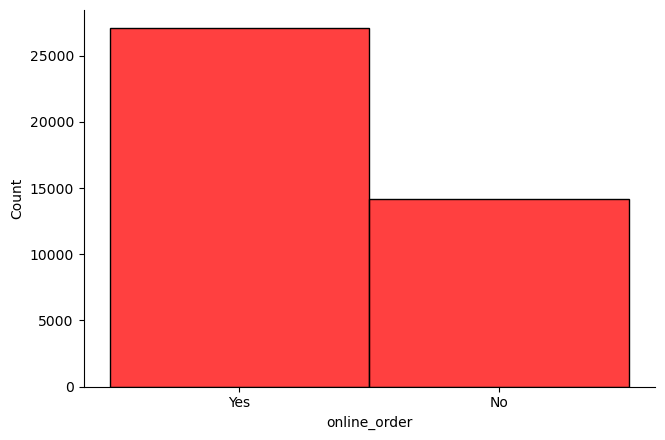

In [21]:
#Restaurants deleviring onliine
online_delivery = sns.displot(zomato['online_order'], color='red', discrete=True, aspect=1.5, height=4.5, kind='hist')
online_delivery

plt.show()

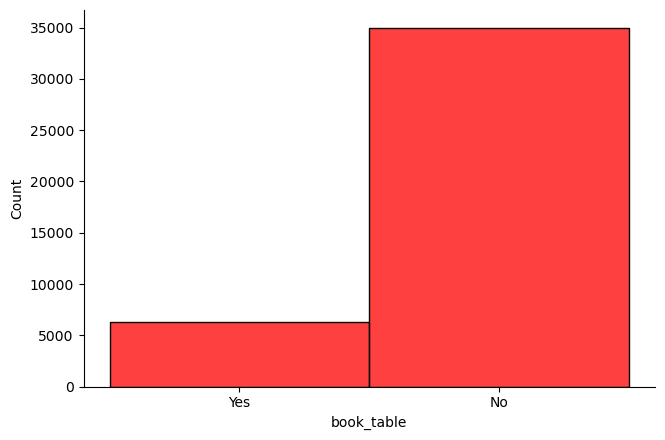

In [22]:
#Restaurants allowing table booking
online_booking = sns.displot(zomato['book_table'], color='red', discrete=True, aspect=1.5, height=4.5, kind='hist')
online_booking

plt.show()

In [23]:
location_grp = zomato.groupby(['location'])
avg_rate_loc = location_grp['rating'].mean().nlargest(5)
avg_rate_loc

location
Lavelle Road             4.141788
Koramangala 3rd Block    4.020419
St. Marks Road           4.017201
Koramangala 5th Block    4.006661
Church Street            3.992125
Name: rating, dtype: float64

In [24]:
high_rest_loc = location_grp['eatery_name'].count().nlargest(10)
high_rest_loc

location
BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
Jayanagar                1634
Whitefield               1572
Marathahalli             1410
Bannerghatta Road        1226
Koramangala 7th Block    1055
Name: eatery_name, dtype: int64

In [25]:
avg_cost_loc = location_grp['approx_cost'].mean().nlargest(5).round(2)
avg_cost_loc

location
Sankey Road         2582.69
Lavelle Road        1365.38
Race Course Road    1321.48
MG Road             1244.51
Infantry Road       1072.86
Name: approx_cost, dtype: float64